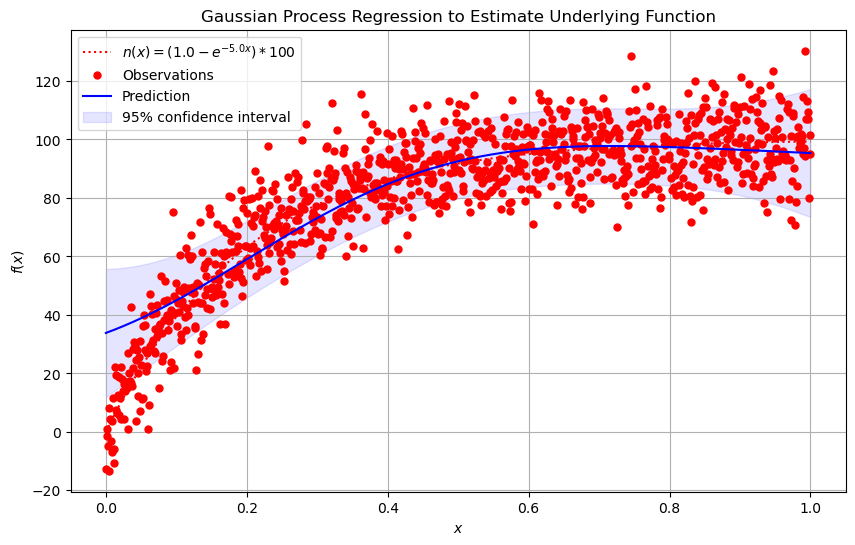

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

def n(x):
    return (1.0 - np.exp(-5.0 * x)) * 100

def generate_observations(x, noise_std):
    return n(x) + np.random.normal(0, noise_std, size=n(x).shape)

# Generate observations
x = np.linspace(0, 1, 1000)
y = generate_observations(x, 10)

# Prepare the data for the Gaussian Process
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Specify Gaussian Process
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, alpha= 25, normalize_y=True)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x, y)

# Make the prediction on the meshed x-axis
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the standard deviation
plt.figure(figsize=(10,6))
plt.plot(x, n(x), 'r:', label=r'$n(x) = (1.0 - e^{-5.0x}) * 100$')
plt.plot(x, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill_between(x.ravel(), y_pred.ravel() - 1.96 * sigma, y_pred.ravel() + 1.96 * sigma, alpha=0.1, color='b', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')
plt.title('Gaussian Process Regression to Estimate Underlying Function')
plt.grid(True)
plt.show()



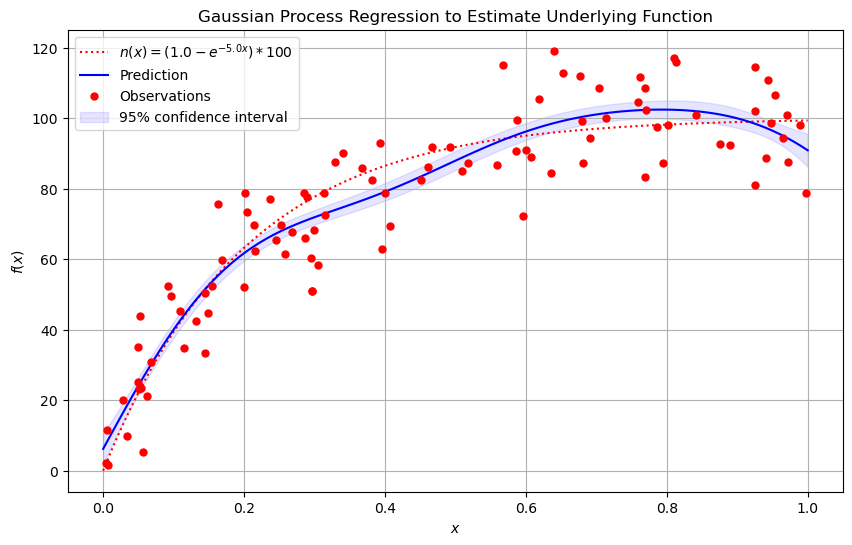

In [23]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


def n(x):
    return (1.0 - np.exp(-5.0 * x)) * 100

def generate_observations(x, noise_std):
    return n(x) + np.random.normal(0, noise_std, size=n(x).shape)

# Generate observations
x = np.linspace(0, 1, 100)


# Prepare the data for the Gaussian Process
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


# Specify Gaussian Process
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

x_train = []
y_train = []
X, Y = None, None
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, alpha= 25)
# Iteratively train Gaussian Process and animate the prediction
for i in range(100):
    #add a new point at random to the training set
    x_train.append(np.random.uniform(0, 1))
    y_train.append(generate_observations(x_train[-1], 10))
      
    X = np.array(x_train).reshape(-1, 1)
    Y = np.array(y_train).reshape(-1, 1)

    gp.fit(X, Y)
    
    y_pred, sigma = gp.predict(x, return_std=True)

ax.clear()
ax.plot(x, n(x), 'r:', label=r'$n(x) = (1.0 - e^{-5.0x}) * 100$')
ax.plot(x, y_pred, 'b-', label='Prediction')
ax.plot(X, Y, 'r.', markersize=10, label='Observations')
    
ax.fill_between(x.ravel(), y_pred.ravel() - 1.96 * sigma, y_pred.ravel() + 1.96 * sigma, alpha=0.1, color='b', label='95% confidence interval')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.legend(loc='upper left')
ax.set_title('Gaussian Process Regression to Estimate Underlying Function')
ax.grid(True)
plt.show()



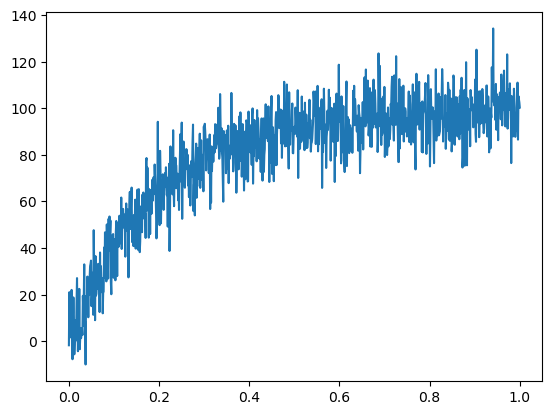

In [18]:
x = np.linspace(0, 1, 1000)
y = generate_observations(x, 10)

plt.plot(x, y)
